In [8]:
import sys
import json
sys.path.append('..')
from analysis.model_performances import *
from common import *

from copy import deepcopy
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
answer_type_ext = tf_answer_type(score_key = F1_SCORE_KEY)
stats_all = collect_stats_all(tf_answer_type(score_key = F1_SCORE_KEY))

100%|██████████| 23040/23040 [00:00<00:00, 74074.04it/s]


In [28]:
stats_all[0]

{'result': 0.47959183673469385,
 'stats': {'num_original': 930,
  'num_corrupted': 48,
  'num_not_corrupted': 882,
  'both_present': 17,
  'both_absent': 0,
  'both_present_%': 0.01927437641723356,
  'both_absent_%': 0.0},
 'model': 'Llama-2-7b-chat-hf',
 'prompt_type': 'few_shot_1',
 'ramification_type': 'without_ramifications',
 'substitution_type': 'with_random_sub',
 'domain_name': 'blocksworld',
 'plan_length': 1,
 'question_category': 'ALL_CATEGORIES',
 'answer_type': 'true_false_answer'}

In [29]:
model_name = 'Llama-2-7b-chat-hf'
prompt_type = 'few_shot_1'
ramifications = WITHOUT_RAMIFICATIONS
answer_type = TRUE_FALSE_ANSWER_TYPE
score_type = F1_SCORE_KEY #results_all#tf_answer_type(score_key = F1_SCORE_KEY)
question_category = ALL_QUESTION_CATEGORIES_KEY
domain = ALL_DOMAINS_KEY

In [30]:
y_with_random_subs = [filter_single_selector(stats_all, plan_length, question_category, ramifications, model_name, prompt_type, domain, answer_type, WITH_RANDOM_SUB) for plan_length in PLAN_LENGTHS]
y_without_random_subs = [filter_single_selector(stats_all, plan_length, question_category, ramifications, model_name, prompt_type, domain, answer_type, WITHOUT_RANDOM_SUB) for plan_length in PLAN_LENGTHS]

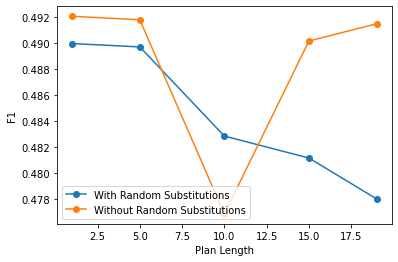

In [31]:
plt.plot(PLAN_LENGTHS, y_with_random_subs, '-o', label='With Random Substitutions')
plt.plot(PLAN_LENGTHS, y_without_random_subs, '-o', label='Without Random Substitutions')
plt.xlabel('Plan Length')
plt.ylabel('F1')
plt.legend()

In [6]:
def by_prompt_type_data(data_all, model, subs, domain, question_category, ramifications):
    by_prompt_type = {}
    for prompt_type in PROMPT_TYPES:
        data = {}
        for length in PLAN_LENGTHS:
            stats = TrueFalseStats(data_all, 
                                    plan_length=length, question_category=question_category, ramifications=ramifications, 
                                    model_name=model, prompt_type=prompt_type, domain=domain, substitutions=subs, score_type='f1')
            data[length] = stats.compute()
        by_prompt_type[prompt_type] = data
    return by_prompt_type

domain = ALL_DOMAINS_KEY
question_category = ALL_CATEGORIES_KEY

Text(0.5, 1.0, 'with_random_sub, without_ramifications')

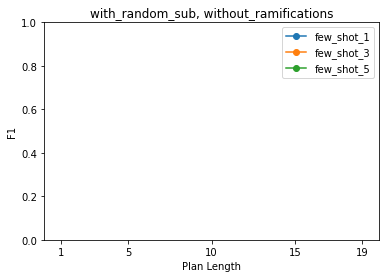

In [7]:
subs = WITH_RANDOM_SUB
ramifications = WITHOUT_RAMIFICATIONS

data = by_prompt_type_data(data_all, model, subs, domain, question_category, ramifications)
for prompt_type, by_length in data.items():
    plt.plot(PLAN_LENGTHS, [d['result'] for d in by_length.values()], '-o', label=prompt_type)
plt.xlabel('Plan Length')
plt.ylabel('F1')
plt.legend()
plt.xlim([0,20])
plt.ylim([0,1])
plt.xticks([1, 5, 10, 15, 19])
plt.title(f'{subs}, {ramifications}')

Text(0.5, 1.0, 'without_random_sub, without_ramifications')

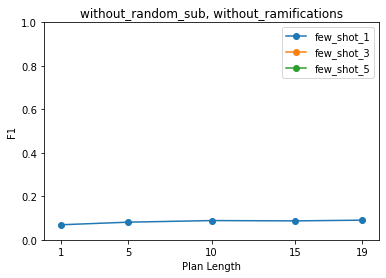

In [10]:
subs = WITHOUT_RANDOM_SUB
ramifications = WITHOUT_RAMIFICATIONS

data = by_prompt_type_data(data_all, model, subs, domain, question_category, ramifications)
for prompt_type, by_length in data.items():
    plt.plot(PLAN_LENGTHS, [d['result'] for d in by_length.values()], '-o', label=prompt_type)
plt.xlabel('Plan Length')
plt.ylabel('F1')
plt.legend()
plt.ylim([0,1])
plt.xlim([0,20])
plt.xticks([1, 5, 10, 15, 19])
plt.title(f'{subs}, {ramifications}')

In [8]:
prompt_type = 'few_shot_1'
subs = WITHOUT_RANDOM_SUB
ramifications = WITHOUT_RAMIFICATIONS
domain = ALL_DOMAINS_KEY

by_question_category = {}
for question_category in QUESTION_CATEGORIES:
    data = {}
    for length in PLAN_LENGTHS:
        stats = TrueFalseStats(data_all, plan_length=length, question_category=question_category, ramifications=ramifications, 
                                        model_name=model, prompt_type=prompt_type, domain=domain, substitutions=subs, score_type='f1')
        data[length] = stats.compute()
    by_question_category[question_category] = data

Text(0.5, 1.0, 'all_domains, without_random_sub, without_ramifications, few_shot_1')

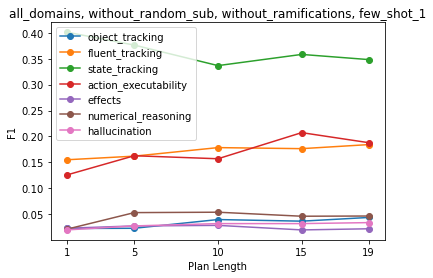

In [9]:
for data_type, by_length in by_question_category.items():
    plt.plot(PLAN_LENGTHS, [d['result'] for d in by_length.values()], '-o', label=data_type)
plt.xlabel('Plan Length')
plt.ylabel('F1')
plt.legend()
plt.xlim([0,20])
# plt.ylim([0,1])
plt.xticks([1, 5, 10, 15, 19])
plt.title(f'{domain}, {subs}, {ramifications}, {prompt_type}')